In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
x = [49.0, 65.0, 45.0, 40.0, 55.0, 45.0, 44.0, 47.0, 50.0, 56.0]
y = [24.0, 40.0, 25.0, 23.5, 33.5, 22.0, 22.5, 23.5, 25.0, 35.0]
dados = {'X': x, 'Y': y}
df = pd.DataFrame(dados)
df.head()

,X,Y
0,49.0,24.0
1,65.0,40.0
2,45.0,25.0
3,40.0,23.5
4,55.0,33.5


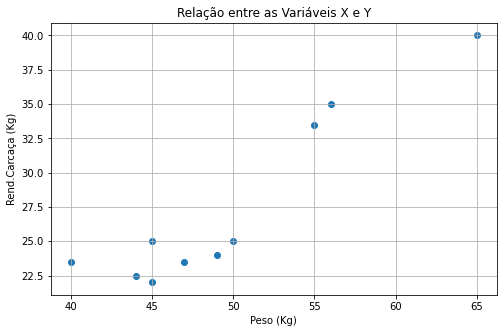

In [20]:
plt.figure(figsize=(8,5))
plt.title('Relação entre as Variáveis X e Y')
plt.scatter(df['X'], df['Y'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Rend.Carcaça (Kg)')
plt.grid(True)
plt.show()

In [5]:
df.sum()

X    496.0
Y    274.0
dtype: float64

In [6]:
df.mean()

X    49.6
Y    27.4
dtype: float64

In [14]:
df['x'] = df.X - df.X.mean()
df['y'] = df.Y - df.Y.mean()
df['x^2'] = (df.X - df.X.mean())**2
df['y^2'] = (df.Y - df.Y.mean())**2
df['xy'] = df['x'] * df['y']
df.head()

,X,Y,x,y,x^2,y^2,xy
0,49.0,24.0,-0.6,-3.4,0.36,11.56,2.04
1,65.0,40.0,15.4,12.6,237.16,158.76,194.04
2,45.0,25.0,-4.6,-2.4,21.16,5.76,11.04
3,40.0,23.5,-9.6,-3.9,92.16,15.21,37.44
4,55.0,33.5,5.4,6.1,29.16,37.21,32.94


In [15]:
beta = df.xy.sum() / df['x^2'].sum()
alfa = df.Y.mean() - beta * df.X.mean()

print('Beta:', beta, ' Alpha:', alfa)

Beta: 0.8068276436303079  Alpha: -12.618651124063277


In [16]:
reta = [alfa + beta * x for x in df.X]
reta

[26.91590341382181,
 39.825145711906735,
 23.688592839300576,
 19.654454621149043,
 31.756869275603655,
 23.688592839300576,
 22.88176519567027,
 25.302248126561196,
 27.722731057452116,
 32.56369691923396]

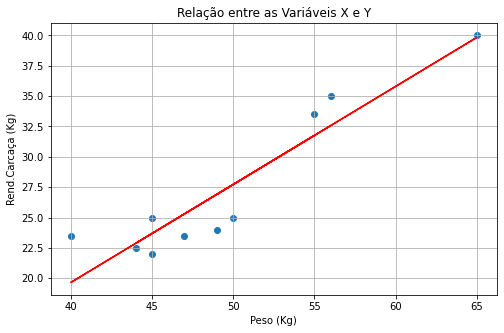

In [17]:
plt.figure(figsize=(8,5))
plt.title('Relação entre as Variáveis X e Y')
plt.plot(df['X'], reta, color='r')
plt.scatter(df['X'], df['Y'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Rend.Carcaça (Kg)')
plt.grid(True)
plt.show()

In [18]:
df['Y-Y^'] = df.Y - reta  # Resíduo
df['(Y-Y^)^2'] = (df.Y - reta) ** 2
df['Y^'] = reta  # Previsto
df.head()

,X,Y,x,y,x^2,y^2,xy,Y-Y^,(Y-Y^)^2,Y^
0,49.0,24.0,-0.6,-3.4,0.36,11.56,2.04,-2.915903,8.502493,26.915903
1,65.0,40.0,15.4,12.6,237.16,158.76,194.04,0.174854,0.030574,39.825146
2,45.0,25.0,-4.6,-2.4,21.16,5.76,11.04,1.311407,1.719789,23.688593
3,40.0,23.5,-9.6,-3.9,92.16,15.21,37.44,3.845545,14.788219,19.654455
4,55.0,33.5,5.4,6.1,29.16,37.21,32.94,1.743131,3.038505,31.756869


In [19]:
# Calcular o SQT, SQE, SQR e R2
SQT = df['y^2'].sum()
SQE = sum((df['Y^'] - df['Y^'].mean()) ** 2)
SQR = sum(df[('(Y-Y^)^2')])
R2 = SQE/SQT

print('Soma de Quadrados Total:', SQT)
print('Soma de Quadrados devido ao Erro aleatório:', SQE)
print('Soma de Quadrados da Regressão:', SQR)
print('Coeficiente de Determinação:', R2)

Soma de Quadrados Total: 360.4
Soma de Quadrados devido ao Erro aleatório: 312.72639467110713
Soma de Quadrados da Regressão: 47.67360532889257
Coeficiente de Determinação: 0.8677202959797645


In [ ]:
# Biblioteca: statsmodels